# **Algorithm Design, Implementation, and Performance Analysis**

## **1. Algorithm Design and Implementation**

### **1.1 Stooge Sort**

The `stooge_sort` method is a recursive sorting algorithm that rearranges the elements of a list in ascending order. It works by comparing the first and last elements of a given range in the list and swapping them if necessary. If the range contains more than two elements, the method recursively sorts the first two-thirds of the range, the last two-thirds of the range, and then the first two-thirds again to ensure the entire range is sorted. While it is not efficient for practical use due to its high time complexity, it serves as an interesting example of a recursive sorting algorithm.

#### **1.1.1 Algorithm Design**

In [11]:
def stooge_sort(A, p=0, r=None):
	if r is None:  # Evaluate this condition only once
		r = len(A) - 1

	def recursive_sort(A, p, r):
		if p >= r:
			return

		# If the first element is greater than the last, swap them
		if A[p] > A[r]:
			A[p], A[r] = A[r], A[p]

		# If there are more than two elements in the array
		if r - p + 1 > 2:
			t = (r - p + 1) // 3

			# Recursively sort the first 2/3 of the array
			recursive_sort(A, p, r - t)

			# Recursively sort the last 2/3 of the array
			recursive_sort(A, p + t, r)

			# Recursively sort the first 2/3 of the array again
			recursive_sort(A, p, r - t)

	# Call the inner recursive function
	recursive_sort(A, p, r)

#### **1.1.2 Functionality Demonstration with a Random List**

We will demonstrate the functionality of the `stooge_sort` algorithm by applying it to a randomly generated list. The unsorted list is displayed before sorting, and the sorted result is shown afterward.

In [12]:
import random

A = [random.randint(1, 10) for _ in range(10)]
print(f'List A: {A}')
stooge_sort(A)
print(f'Sorted list: {A}')

List A: [10, 8, 5, 9, 6, 8, 1, 3, 7, 7]
Sorted list: [1, 3, 5, 6, 7, 7, 8, 8, 9, 10]


#### **1.1.3 Validation of Correctness**
We will validate the correctness of `stooge_sort` by comparing its results with the built-in `list.sort()` method.

In [13]:
import random

m = 200  # The maximum size of the list to test
test = True  # A flag to track whether all tests pass

# Loop through list sizes from 10 to m (inclusive) in steps of 5
for n in range(10, m+1, 5):  
  A = [random.randint(1, n) for _ in range(n)]  # Generate a random list of size n
  B = A.copy()  # Create a copy of the list to compare results later

  stooge_sort(A)  # Sort the list using the stooge_sort algorithm
  B.sort()  # Sort the copy using Python's built-in sort method (reference)

  # Compare the results of stooge_sort with the built-in sort
  if A != B:  
    print('stooge_sort got a different result!!!')  # Print an error message if the results differ
    test = False  # Set the flag to False to indicate a failure
    break  # Exit the loop as the test failed

# If all tests pass, print a success message
if test:  
  print('stooge_sort works perfectly!!!')

stooge_sort works perfectly!!!


### **1.2 Bubble Sort**

For more detailed information for this algorythm, please visit the referred repository. The link to the repository can be found in the main `README` file.

#### **1.2.1 Algorithm Design**

In [14]:
def bubble_sort(A):
	n = len(A)
	for i in range(n):  # Outer loop to iterate through the entire list
		# The last i elements are already sorted in each iteration
		for j in range(0, n - i - 1):  # Inner loop to compare adjacent elements
			if A[j] > A[j + 1]:  # If the current element is greater than the next
				A[j], A[j + 1] = A[j + 1], A[j]  # Swap the elements

## **2. Experiment Block: Performance Comparison**

### **2.1 Importing Libraries and Setting Up Paths**

In [15]:
import random
import time
import matplotlib.pyplot as plt
import os
import sys

sys.path.append(os.path.abspath("../img"))

### **2.2 Utility Functions for Input Generation**

In [16]:
def random_list(n):
	# Generates a list of 'n' random integers between 1 and 'n'
	return [random.randint(1, n) for _ in range(n)]

def sorted_list(n):
	# Generates a sorted list of integers from 1 to 'n' (inclusive)
	return list(range(1, n+1))

def reverse_sorted_list(n):
	# Generates a reverse-sorted list of integers from 'n' to 1
	return list(range(n, 0, -1))

### **2.3 Utility Functions for Performance Measurement and Visualization**

In [17]:
# Function that computes the execution time
def execution_time(fun, *args):
	# Record the start time before the function call
	start = time.time()
	
	# Call the function with the provided arguments
	fun(*args)
	
	# Record the end time after the function call
	end = time.time()
	
	# Return the difference between end and start times (execution duration)
	return end - start



# Function that compares execution time
def comparison_machine(sizes, reps, algorithm, scenario):
	# Initialize a list to store total execution times for each algorithm
	total_time = [[] for _ in algorithm]
	
	# Loop through each size in the list of sizes
	for n in sizes:
		# Initialize a list to store the cumulative execution time for each algorithm
		cumulative_time = [0 for _ in algorithm]
		
		# Repeat the experiment 'reps' times for each size
		for _ in range(reps):
			# Generate a sample list of size 'n' using the provided scenario function
			list_sample = scenario(n)
			
			# Loop through each algorithm and measure its execution time
			for i, algo in enumerate(algorithm):
				# Create a copy of the sample list to avoid modifying the original
				list_copy = list_sample.copy()
				
				# Measure the execution time of the algorithm and add it to the cumulative time
				cumulative_time[i] += execution_time(algo, list_copy)
		
		# Calculate the average execution time for each algorithm and append it to total_times
		for i, t in enumerate(cumulative_time):
			total_time[i].append(t / reps)
	
	# Return the list of average execution times for each algorithm
	return total_time



# Function that plots the results
def comparison_graph(sizes, t, algorithm, scenario):
	# Create the plot
	for i, algo in enumerate(algorithm):
		# Plot the execution times for each algorithm
		plt.plot(sizes, t[i], label=algo.__name__)
	
	# Plot features
	plt.title(f'Comparison ({scenario.__name__})') # Title
	plt.xlabel("List size (n)") # x-axis label
	plt.ylabel("Average time (s)") # y-axis label
	plt.legend(loc='upper left') # show legend

	# Relative path to the 'img' folder from the notebook location
	img_path = os.path.join("..", "img")
	
	# Ensure the 'img' folder exists; create it if it doesn't
	os.makedirs(img_path, exist_ok=True)

	# Save the graph to the 'img' folder with a filename based on the scenario name
	filename = os.path.join(img_path, f"{scenario.__name__}_comparison_1.png")
	plt.savefig(filename, bbox_inches="tight")  # Save the plot with tight bounding box
	print(f"Graph saved to: {filename}")  # Print the location of the saved graph
	
	# Display the plot
	plt.show()



# Function that calls all the machinery
def machine_call(sizes, reps, algorithm, scenario):
	# Call the comparison_machine function to compute execution times
	t = comparison_machine(sizes, reps, algorithm, scenario)
	
	# Call the comparison_graph function to plot the results
	comparison_graph(sizes, t, algorithm, scenario)

### **2.4 Comparison with `random_list`**

This subsection evaluates the performance of `bubble_sort` and `stooge_sort` algorithms using randomly generated input lists of varying sizes. The execution times are measured and averaged over multiple repetitions, and the results are visualized in a comparison graph. This analysis helps to understand the efficiency and scalability of the algorithms under random input conditions.

Graph saved to: ..\img\random_list_comparison_1.png


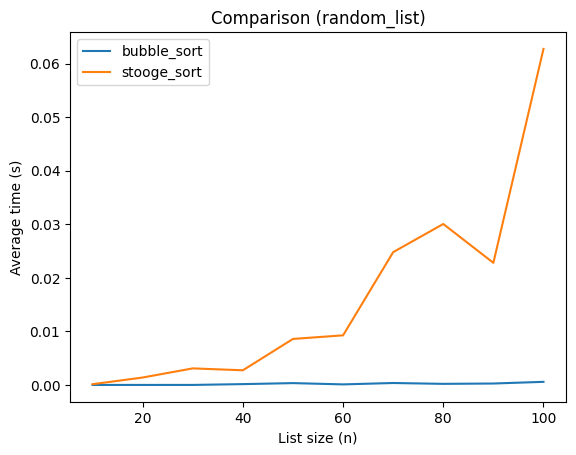

In [18]:
samples = 10  # Number of sample points (input sizes) to test
step_size = 10  # Step size for generating input sizes
sizes = [i * step_size for i in range(1, samples + 1)]  # List of input sizes to test (e.g., [10, 20, ..., 100])

reps = 10  # Number of repetitions for each input size to calculate average execution time

algorithm = [bubble_sort, stooge_sort]  # List of algorithms to compare
scenario = random_list # Scenario (random list generator) to test

# Call the machine_call function to compute execution times and generate a comparison graph
machine_call(sizes, reps, algorithm, scenario)

The plot above demonstrates the performance comparison between `bubble_sort` and `stooge_sort` algorithms under the `random_list` scenario. It is evident that `bubble_sort` consistently outperforms `stooge_sort` across all input sizes.

### **2.5 Comparison with `sorted_list`**

This subsection evaluates the performance of `bubble_sort` and `stooge_sort` algorithms using pre-sorted input lists of varying sizes. The execution times are measured and averaged over multiple repetitions, and the results are visualized in a comparison graph. This analysis highlights the behavior of the algorithms when applied to already sorted data, providing insights into their best-case performance.

Graph saved to: ..\img\sorted_list_comparison_1.png


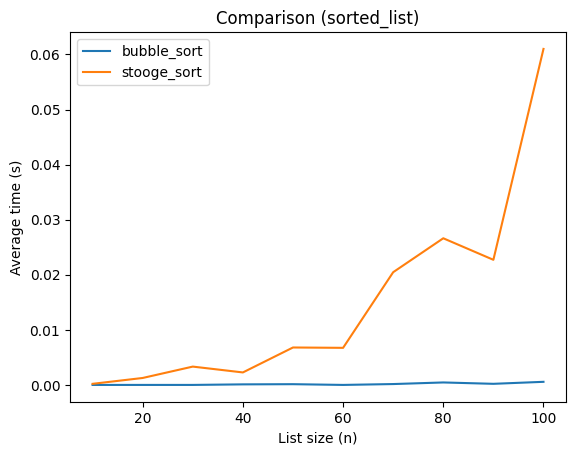

In [19]:
samples = 10  # Number of sample points (input sizes) to test
step_size = 10  # Step size for generating input sizes
sizes = [i * step_size for i in range(1, samples + 1)]  # List of input sizes to test (e.g., [10, 20, ..., 100])

reps = 10  # Number of repetitions for each input size to calculate average execution time

algorithm = [bubble_sort, stooge_sort]  # List of algorithms to compare
scenario = sorted_list # Scenario (sorted list generator) to test

# Call the machine_call function to compute execution times and generate a comparison graph
machine_call(sizes, reps, algorithm, scenario)

As expected, `bubble_sort` demonstrates better performance than `stooge_sort`. This highlights the inefficiency of `stooge_sort` even in best-case scenarios, reaffirming its theoretical rather than practical utility.

### **2.6 Comparison with `reverse_sorted_list`**

This subsection evaluates the performance of `bubble_sort` and `stooge_sort` algorithms using reverse-sorted input lists of varying sizes. The execution times are measured and averaged over multiple repetitions, and the results are visualized in a comparison graph. This analysis provides insights into the behavior of the algorithms in their worst-case scenarios, highlighting their efficiency and scalability under such conditions.

Graph saved to: ..\img\reverse_sorted_list_comparison_1.png


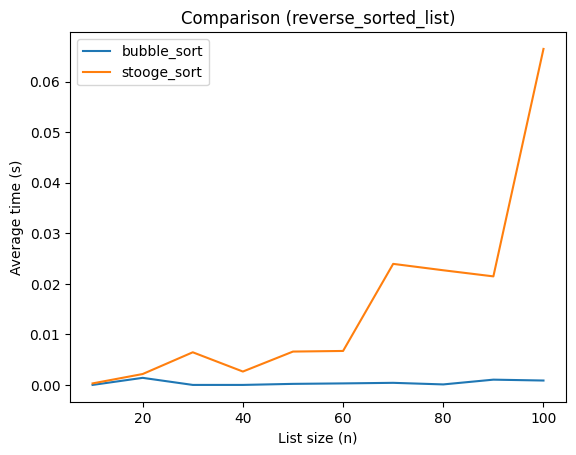

In [20]:
samples = 10  # Number of sample points (input sizes) to test
step_size = 10  # Step size for generating input sizes
sizes = [i * step_size for i in range(1, samples + 1)]  # List of input sizes to test (e.g., [10, 20, ..., 100])

reps = 10  # Number of repetitions for each input size to calculate average execution time

algorithm = [bubble_sort, stooge_sort]  # List of algorithms to compare
scenario = reverse_sorted_list # Scenario (reverse sorted list generator) to test

# Call the machine_call function to compute execution times and generate a comparison graph
machine_call(sizes, reps, algorithm, scenario)

As observed, `bubble_sort` consistently outperforms `stooge_sort` across all input sizes. This result aligns with the theoretical time complexities of the algorithms, where `stooge_sort` exhibits significantly higher computational overhead, making it impractical for larger datasets.

## **Conclusion**

The objective of this notebook was to compare the time complexity of `stooge_sort` and `bubble_sort` under three different scenarios: `random_list`, `sorted_list`, and `inverted_list`. Based on the results obtained from the experiments and the graphs generated, the following conclusions can be drawn:

1. **Overall Performance**:
	- `bubble_sort` consistently outperformed `stooge_sort` in all scenarios. This is expected as `bubble_sort` has a time complexity of $O(n^2)$, while `stooge_sort` has a worse time complexity of $O(n^{\log_{1.5} 3}) \approx O(n^{2.7095})$.

2. **Scalability**:
	- The experiments highlight that `stooge_sort` is not practical for larger input sizes due to its high time complexity and recursive overhead.
	- `bubble_sort`, while not optimal compared to more advanced sorting algorithms, is still more efficient than `stooge_sort` for the input sizes tested.

### Final Remarks:
The results confirm that `stooge_sort` is primarily of theoretical interest and not suitable for practical use cases. `bubble_sort`, while also inefficient compared to modern sorting algorithms, is a better choice in this comparison.